In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [4]:
DATADIR = "C:/Users/Yugesh/Dataset/Train"

In [5]:
CATEGORIES = ["no", "yes"]


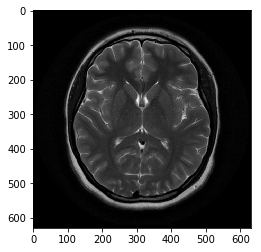

In [6]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [7]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(img_array.shape)

(630, 630)


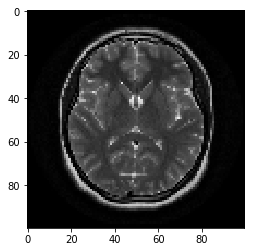

In [9]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:   
        path = os.path.join(DATADIR,category)  # create path 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 
        
        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [11]:
create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 276.97it/s]


253


In [12]:
import random

random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
1
0
1
0
0


In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  ...

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()